# Fashion MNIST Project
#### Fashion-MNIST is a dataset consisting of a training set of 60,000 images and a testing set of 10,000 images. Each image is 28x28 grayscale, associated with a label from 10 different features.

Using different Machine Learning Algorithims (Supervised, Unsupervised and Deep Learning), I will try to get the models to predict what type of clothing/label is in each 28x28 grayscale image with the highest accuracy I can achieve.

Alon Firestein

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import KFold, cross_val_score
from sklearn import metrics
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("x_train Shape:", x_train.shape,"\n" "y_train Shape:", y_train.shape)
print("x_test Shape:", x_test.shape,"\n" "y_test Shape:", y_test.shape)

x_train Shape: (60000, 28, 28) 
y_train Shape: (60000,)
x_test Shape: (10000, 28, 28) 
y_test Shape: (10000,)


# Labels
#### Each training and test example is assigned to one of the following labels to identify it:

Label - Description

0 - T-shirt/top

1 - Trouser

2 - Pullover

3 - Dress

4 - Coat

5 - Sandal

6 - Shirt

7 - Sneaker

8 - Bag

9 - Ankle boot



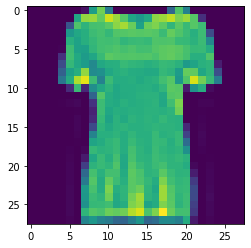

In [26]:
plt.imshow(x_train[10])

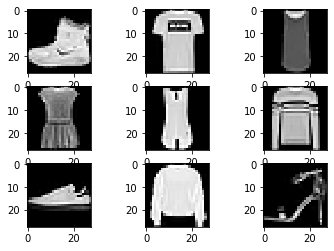

In [27]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [3]:
x=x_train
y=y_train
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train /= 255.0
x_test /= 255.0
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


### Using PCA:
We're using PCA to condense the images and use only a small fraction of the data of each image, therefore saving a lot of memory while still being able to predict each image with the same accuracy. 

In [223]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.98)
pca.fit(x_train)
compressed_x_train = pca.transform(x_train)
decompressed_x_train = pca.inverse_transform(compressed_x_train)
compressed_x_test = pca.transform(x_test)
decompressed_x_test = pca.inverse_transform(compressed_x_test)
print("Number of components before PCA  = " + str(x_train.shape[1]))
print("Number of components after PCA 0.98 = " + str(pca.n_components_),"\n") 
print("Dimension of our data after PCA  = " + str(compressed_x_train.shape))
print("Dimension of our data after inverse transforming the PCA  = " + str(decompressed_x_train.shape))

Number of components before PCA  = 784
Number of components after PCA 0.98 = 349 

Dimension of our data after PCA  = (60000, 349)
Dimension of our data after inverse transforming the PCA  = (60000, 784)


###### Example of image after being compressed by the PCA, showing no major difference on the image:

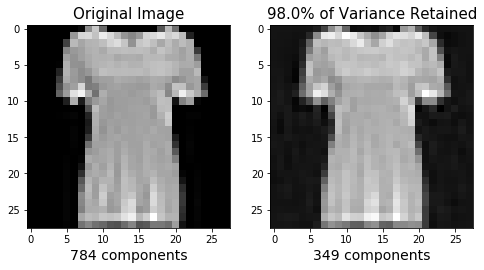

In [226]:
plt.figure(figsize=(8,4));

plt.subplot(1, 2, 1);
plt.imshow(x_train[10].reshape(x.shape[1], x.shape[2]),
              cmap = plt.cm.gray,);
plt.xlabel(str(x_train.shape[1])+' components', fontsize = 14)
plt.title('Original Image', fontsize = 15);

plt.subplot(1, 2, 2);
plt.imshow(decompressed_x_train[10].reshape(x.shape[1], x.shape[2]),
              cmap = plt.cm.gray,);
plt.xlabel(str(compressed_x_train.shape[1]) +' components', fontsize = 14)
plt.title(str(0.98 * 100) + '% of Variance Retained', fontsize = 15);

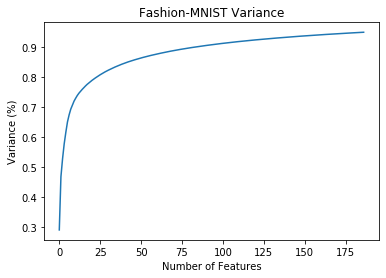

In [8]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Features')
plt.ylabel('Variance (%)')
plt.title('Fashion-MNIST Variance')
plt.show()

In the graph above, we can infer that by using around 150 features, we can retain approximately 94% of the original data after being compressed. 

# Convolutional Neural Network:

In [69]:
((train_x, train_y), (test_x, test_y)) = fashion_mnist.load_data()
x_train = train_x[:,:,:,np.newaxis] / 255.0
x_test = test_x[:,:,:,np.newaxis] / 255.0
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28, 1))) 
cnn_model.add(MaxPooling2D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(10, activation='softmax'))
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [70]:
cnn_model.summary()
cnn_model.fit(x_train, y_train, epochs=10, validation_split=0.1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                125450    
Total params: 125,770
Trainable params: 125,770
Non-trainable params: 0
_________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 32s 601us/sample - loss: 0.4325 - accuracy: 0.8494 - val_loss: 0.3304 - val_accuracy: 0.8808
Epoch 2/10
54000/54000 [======================

In [71]:
print("-----------------Convolutional Neural Network---------------")
print("CNN model loss and accuracy: ", "\n", cnn_model.evaluate(x_test, y_test))

-----------------Convolutional Neural Network---------------
10000/10000 [==============================] - 2s 193us/sample - loss: 0.2953 - accuracy: 0.8988
CNN model loss and accuracy:  
 [0.2953449152112007, 0.8988]


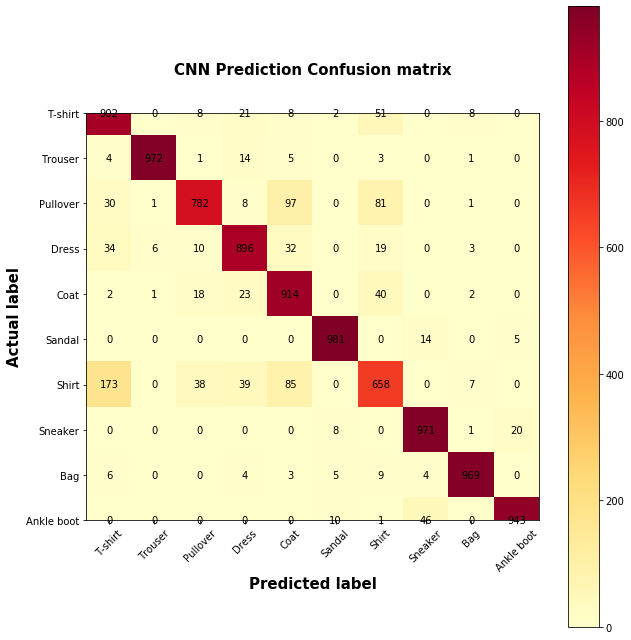

In [84]:
y_pred_cnn = cnn_model.predict_classes(x_test)
y_pred_series = pd.Series(y_pred_cnn)
cm = confusion_matrix(y_test, y_pred_series)
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='YlOrRd')
plt.title('CNN Prediction Confusion matrix', size = 15, y=1.08, fontweight="bold")
plt.colorbar()
tick_marks = np.arange(10)

plt.xticks(tick_marks, ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
                       rotation=45, size = 10)
plt.yticks(tick_marks, ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
                       size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15, fontweight="bold")
plt.xlabel('Predicted label', size = 15, fontweight="bold")
width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center')

# KNN:

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
knn_f1 = metrics.f1_score(y_test, y_pred_knn, average= "weighted")
knn_accuracy = metrics.accuracy_score(y_test, y_pred_knn)
knn_cm = metrics.confusion_matrix(y_test, y_pred_knn)
print("-----------------K-nearest neighbors Report---------------")
print("F1 score: {}".format(knn_f1))
print("Accuracy score: {}".format(knn_accuracy))
print("Confusion matrix: \n", knn_cm)
print(metrics.classification_report(y_test, y_pred_knn))
kf = KFold(n_splits=5,shuffle=True, random_state=123)
cv_scores = cross_val_score(knn,x_train,y_train,cv=kf)
print("Cross Validation Scores:", cv_scores)
print("Cross Validation Scores Mean:", cv_scores.mean(),"\n")

-----------------K-nearest neighbors Report---------------
F1 score: 0.8546439722018904
Accuracy score: 0.8554
Confusion matrix: 
 [[855   1  17  16   3   1 100   1   6   0]
 [  8 968   4  12   4   0   3   0   1   0]
 [ 24   2 819  11  75   0  69   0   0   0]
 [ 41   8  15 860  39   0  34   0   3   0]
 [  2   1 126  26 773   0  71   0   1   0]
 [  1   0   0   0   0 822   5  96   1  75]
 [176   1 132  23  80   0 575   0  13   0]
 [  0   0   0   0   0   3   0 961   0  36]
 [  2   0  10   4   7   0  16   7 953   1]
 [  0   0   0   0   0   2   1  29   0 968]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.73      0.82      0.77      1000
           3       0.90      0.86      0.88      1000
           4       0.79      0.77      0.78      1000
           5       0.99      0.82      0.90      1000
           6       0.66      0.57      0.61      1000
     

In [233]:
print("------------K-nearest neighbors w/ PCA------------")
knn.fit(compressed_x_train,y_train)
y_pred_knn = knn.predict(compressed_x_test)
print(classification_report(y_test, y_pred_knn))

------------K-nearest neighbors w/ PCA------------
              precision    recall  f1-score   support

           0       0.78      0.85      0.81      1000
           1       0.98      0.97      0.98      1000
           2       0.73      0.81      0.77      1000
           3       0.90      0.86      0.88      1000
           4       0.78      0.77      0.78      1000
           5       0.99      0.84      0.91      1000
           6       0.67      0.59      0.63      1000
           7       0.89      0.96      0.92      1000
           8       0.97      0.96      0.96      1000
           9       0.91      0.97      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



# AdaBoost:

In [20]:
from sklearn.ensemble import AdaBoostClassifier

adb= AdaBoostClassifier(n_estimators=100, random_state=42)
adb.fit(x_train,y_train)
y_pred_adb = adb.predict(x_test)
adb_f1 = metrics.f1_score(y_test, y_pred_adb, average= "weighted")
adb_accuracy = metrics.accuracy_score(y_test, y_pred_adb)
adb_cm = metrics.confusion_matrix(y_test, y_pred_adb)
print("--------------------AdaBoost------------------")
print("F1 score: {}".format(adb_f1))
print("Accuracy score: {}".format(adb_accuracy))
print("Confusion matrix: \n", adb_cm)
print(metrics.classification_report(y_test, y_pred_adb))
kf = KFold(n_splits=5,shuffle=True, random_state=123)
cv_scores = cross_val_score(adb,x_train,y_train,cv=kf)
print("Cross Validation Scores:", cv_scores)
print("Cross Validation Scores Mean:", cv_scores.mean(),"\n")

--------------------AdaBoost------------------
F1 score: 0.5464460623213531
Accuracy score: 0.5618
Confusion matrix: 
 [[ 53  24 243 203  14   0 452   0  11   0]
 [  5 780   6 180   6   0  23   0   0   0]
 [ 15   1 646  16 216   0 103   0   3   0]
 [  7  84  82 709  33   0  83   0   2   0]
 [  2   1 443  48 387   0 116   0   3   0]
 [  0   0   0   1   0 581   0 352  15  51]
 [ 24  12 464 114 128   1 238   0  19   0]
 [  0   0   0   0   0  52   0 942   2   4]
 [ 25   1  16   5   9  10  70  26 837   1]
 [  0   0   0   0   0  86   0 458  11 445]]
              precision    recall  f1-score   support

           0       0.40      0.05      0.09      1000
           1       0.86      0.78      0.82      1000
           2       0.34      0.65      0.45      1000
           3       0.56      0.71      0.62      1000
           4       0.49      0.39      0.43      1000
           5       0.80      0.58      0.67      1000
           6       0.22      0.24      0.23      1000
           7     

In [229]:
print("-------------AdaBoost w/ PCA-------------","\n")
adb.fit(compressed_x_train,y_train)
y_pred_adb = adb.predict(compressed_x_test)
print(classification_report(y_test, y_pred_adb))

-------------AdaBoost w/ PCA------------- 

              precision    recall  f1-score   support

           0       0.37      0.10      0.15      1000
           1       0.70      0.82      0.75      1000
           2       0.35      0.71      0.47      1000
           3       0.38      0.77      0.51      1000
           4       0.32      0.12      0.18      1000
           5       0.62      0.61      0.62      1000
           6       0.26      0.04      0.07      1000
           7       0.59      0.69      0.63      1000
           8       0.80      0.77      0.79      1000
           9       0.89      0.72      0.80      1000

    accuracy                           0.54     10000
   macro avg       0.53      0.54      0.50     10000
weighted avg       0.53      0.54      0.50     10000



# Naive Bayes:

In [19]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred_nb = nb.predict(x_test)
nb_f1 = metrics.f1_score(y_test, y_pred_nb, average= "weighted")
nb_accuracy = metrics.accuracy_score(y_test, y_pred_nb)
nb_cm = metrics.confusion_matrix(y_test, y_pred_nb)
print("--------------------Naive Bayes------------------")
print("F1 score: {}".format(nb_f1))
print("Accuracy score: {}".format(nb_accuracy))
print("Confusion matrix: \n", nb_cm)
print(metrics.classification_report(y_test, y_pred_nb))
kf = KFold(n_splits=5,shuffle=True, random_state=123)
cv_scores = cross_val_score(nb,x_train,y_train,cv=kf)
print("Cross Validation Scores:", cv_scores)
print("Cross Validation Scores Mean:", cv_scores.mean(),"\n")

--------------------Naive Bayes------------------
F1 score: 0.5561601931134046
Accuracy score: 0.5856
Confusion matrix: 
 [[586  64  29 162 110   0  20   0  29   0]
 [  1 939  14  36   7   0   1   0   2   0]
 [  7  14 324  65 545   0  23   0  22   0]
 [  9 387   6 545  43   0   4   0   6   0]
 [  0  34  44 131 779   0   4   0   8   0]
 [  0   0   1   1   0 278   3 660   5  52]
 [117  34 112 200 435   0  40   0  62   0]
 [  0   0   0   0   0   3   0 988   0   9]
 [  0   2  19  85 149   3  27   4 710   1]
 [  0   0   1   1   0  16   3 304   8 667]]
              precision    recall  f1-score   support

           0       0.81      0.59      0.68      1000
           1       0.64      0.94      0.76      1000
           2       0.59      0.32      0.42      1000
           3       0.44      0.55      0.49      1000
           4       0.38      0.78      0.51      1000
           5       0.93      0.28      0.43      1000
           6       0.32      0.04      0.07      1000
           7  

In [227]:
print("---------------Naive Bayes w/ PCA---------------","\n")
nb.fit(compressed_x_train,y_train)
y_pred_nb = nb.predict(compressed_x_test)
print(classification_report(y_test, y_pred_nb))

---------------Naive Bayes w/ PCA--------------- 

              precision    recall  f1-score   support

           0       0.73      0.58      0.65      1000
           1       0.67      0.87      0.76      1000
           2       0.54      0.67      0.60      1000
           3       0.78      0.56      0.65      1000
           4       0.67      0.60      0.63      1000
           5       0.70      0.70      0.70      1000
           6       0.36      0.21      0.27      1000
           7       0.72      0.83      0.77      1000
           8       0.54      0.81      0.65      1000
           9       0.93      0.75      0.83      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.65     10000
weighted avg       0.66      0.66      0.65     10000



# Decision Tree:

In [57]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
dt_f1 = metrics.f1_score(y_test, y_pred_dt, average= "weighted")
dt_accuracy = metrics.accuracy_score(y_test, y_pred_dt)
dt_cm = metrics.confusion_matrix(y_test, y_pred_dt)
print("--------------------Decision Tree------------------")
print("F1 score: {}".format(dt_f1))
print("Accuracy score: {}".format(dt_accuracy))
print("Confusion matrix: \n", dt_cm)
print(metrics.classification_report(y_test, y_pred_dt))
kf = KFold(n_splits=5,shuffle=True, random_state=123)
cv_scores = cross_val_score(dt,x_train,y_train,cv=kf)
print("Cross Validation Scores:", cv_scores)
print("Cross Validation Scores Mean:", cv_scores.mean(),"\n")

--------------------Decision Tree------------------
F1 score: 0.7907773253897908
Accuracy score: 0.7903
Confusion matrix: 
 [[737   1  30  37  14   2 166   0  12   1]
 [  5 953   6  18   7   0   7   0   3   1]
 [ 20   1 658  25 143   1 139   0  12   1]
 [ 50  33  21 777  58   0  47   0  14   0]
 [ 13   3 173  48 638   0 112   0  13   0]
 [  1   4   0   1   1 879   0  66  19  29]
 [148   7 128  37 111   3 542   1  20   3]
 [  1   0   0   0   0  41   0 896   4  58]
 [ 10   2  15   2  11  15  23   4 914   4]
 [  2   0   0   0   1  16   0  67   5 909]]
              precision    recall  f1-score   support

           0       0.75      0.74      0.74      1000
           1       0.95      0.95      0.95      1000
           2       0.64      0.66      0.65      1000
           3       0.82      0.78      0.80      1000
           4       0.65      0.64      0.64      1000
           5       0.92      0.88      0.90      1000
           6       0.52      0.54      0.53      1000
           7

In [231]:
print("----------------Decision Tree w/ PCA---------------")
dt.fit(compressed_x_train,y_train)
y_pred_dt = dt.predict(compressed_x_test)
print(classification_report(y_test, y_pred_dt))

----------------Decision Tree w/ PCA---------------
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1000
           1       0.93      0.94      0.94      1000
           2       0.63      0.66      0.64      1000
           3       0.79      0.77      0.78      1000
           4       0.64      0.63      0.63      1000
           5       0.89      0.85      0.87      1000
           6       0.48      0.47      0.47      1000
           7       0.86      0.87      0.86      1000
           8       0.91      0.90      0.90      1000
           9       0.88      0.90      0.89      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



# Random Forest:

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
rf_f1 = metrics.f1_score(y_test, y_pred_rf, average= "weighted")
rf_accuracy = metrics.accuracy_score(y_test, y_pred_rf)
rf_cm = metrics.confusion_matrix(y_test, y_pred_rf)
print("--------------------Random Forest------------------")
print("F1 score: {}".format(rf_f1))
print("Accuracy score: {}".format(rf_accuracy))
print("Confusion matrix: \n", rf_cm)
print(metrics.classification_report(y_test, y_pred_rf))
kf = KFold(n_splits=5,shuffle=True, random_state=123)
cv_scores = cross_val_score(rf,x_train,y_train,cv=kf)
print("Cross Validation Scores:", cv_scores)
print("Cross Validation Scores Mean:", cv_scores.mean(),"\n")

--------------------Random Forest------------------
F1 score: 0.85085992068227
Accuracy score: 0.8529
Confusion matrix: 
 [[849   1  15  33   5   1  86   0  10   0]
 [  7 960   3  19   1   0  10   0   0   0]
 [ 21   1 791   8 123   0  54   0   2   0]
 [ 33   7  15 880  36   0  25   0   4   0]
 [  6   1 141  41 757   0  52   0   2   0]
 [  0   0   0   1   0 951   0  26   1  21]
 [184   2 134  36  96   0 525   0  23   0]
 [  0   0   0   0   0  30   0 929   0  41]
 [  4   2   7   4   5   4  11   3 959   1]
 [  0   0   0   0   1  16   0  52   3 928]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1000
           1       0.99      0.96      0.97      1000
           2       0.72      0.79      0.75      1000
           3       0.86      0.88      0.87      1000
           4       0.74      0.76      0.75      1000
           5       0.95      0.95      0.95      1000
           6       0.69      0.53      0.60      1000
           7  

In [169]:
rf = RandomForestClassifier(criterion='entropy', max_depth=70, n_estimators=100)
rf.fit(compressed_x_train, y_train)
y_pred_forest_pca = rf.predict(compressed_x_test)
rf_pca_f1 = metrics.f1_score(y_test, y_pred_forest_pca, average= "weighted")
rf_pca_accuracy = metrics.accuracy_score(y_test, y_pred_forest_pca)
rf_pca_cm = metrics.confusion_matrix(y_test, y_pred_forest_pca)
print("----------------Random Forest w/ PCA---------------")
print("F1 score: {}".format(rf_pca_f1))
print("Accuracy score: {}".format(rf_pca_accuracy))
print("Confusion matrix: \n", rf_pca_cm)
print(metrics.classification_report(y_test, y_pred_forest_pca))

----------------Random Forest w/ PCA---------------
F1 score: 0.5472670070670903
Accuracy score: 0.5664
Confusion matrix: 
 [[414   0  28  85  20   0 300 152   0   1]
 [ 19 629  54 212  29   0  49   8   0   0]
 [ 15   0 491  13 238   0 218  25   0   0]
 [ 16   0   8 815  42   0  97  22   0   0]
 [  1   0  34  29 759   0 161  16   0   0]
 [ 12   0  50  41  23  38 143 665  11  17]
 [ 68   0  84  55 125   0 585  81   2   0]
 [  0   0   0   1   1   1   2 980   0  15]
 [ 18   4  51  96 190   0 146 165 330   0]
 [  1   0  13   4  32   1  62 264   0 623]]
              precision    recall  f1-score   support

           0       0.73      0.41      0.53      1000
           1       0.99      0.63      0.77      1000
           2       0.60      0.49      0.54      1000
           3       0.60      0.81      0.69      1000
           4       0.52      0.76      0.62      1000
           5       0.95      0.04      0.07      1000
           6       0.33      0.58      0.42      1000
           7

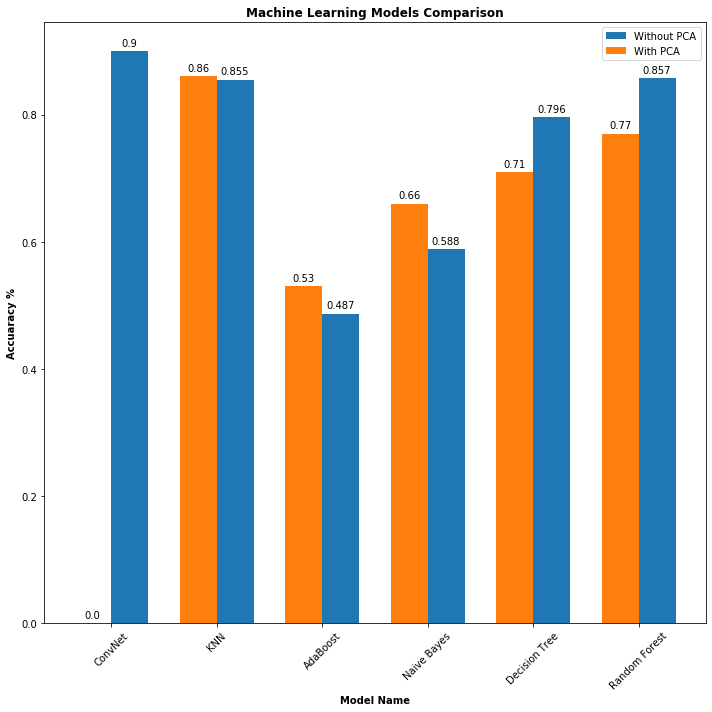

In [253]:
labels = ['ConvNet', 'KNN', 'AdaBoost','Naive Bayes', 'Decision Tree', 'Random Forest']
no_pca = [0.90, 0.855,0.487,0.588,0.796, 0.857]
with_pca = [0, 0.86, 0.53, 0.66, 0.71,0.77]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
x = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(10,10))
rects1 = ax.bar(x + width/2, no_pca, width)
rects2 = ax.bar(x - width/2, with_pca, width)
ax.set_title('Machine Learning Models Comparison', fontweight="bold")
ax.set_xlabel('Model Name', fontweight="bold")
ax.set_ylabel('Accuaracy %', fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.legend(['Without PCA', 'With PCA'], loc='best')
plt.xticks(rotation=45)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
plt.tight_layout()
plt.show()